# Learn GeoPandas

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.head()

In [ ]:
world.shape

In [ ]:
world.plot()

In [ ]:
world.geometry.name


In [ ]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

In [ ]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')
world.plot()

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
cities.plot()

In [ ]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap')

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd')

In [ ]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

### Maps with Layers

In [ ]:
cities.plot(marker="*", color='green', markersize=5)

In [ ]:
cities = cities.to_crs(world.crs)

#### Method 1

In [ ]:
base = world.plot(color='white')
cities.plot(ax=base, marker='o', color='red', markersize=5)

#### Method 2

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

world.plot(ax=ax, color='white')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

### Re-Projecting

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.crs

In [ ]:
world.plot()

In [ ]:
world = world[(world.name != 'Antarctica') & (world.name != 'Fr. S. Antarctic Lands')]

In [ ]:
world = world.to_crs({'init': 'epsg:3395'})

In [ ]:
world.plot()

### Geometric Manipulations

In [ ]:
from shapely.geometry import Polygon

In [ ]:
p1 = Polygon([(0,0), (1,0), (1, 1)])
p2 = Polygon([(0,0), (1,0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])

In [ ]:
g

In [ ]:
g.plot()

In [ ]:
print(g.area)

In [ ]:
g.buffer(0.5)

In [ ]:
g.buffer(0.5).plot()

### The different Overlay Operations

In [ ]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                        Polygon([(2, 2), (4,2), (4,4), (2,4)])])
polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3, 3), (1, 3)]),
                       Polygon([(3, 3), (5,3), (5,5), (3, 5)])])

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1, 2]})
df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1, 2]})

In [ ]:
ax = df1.plot(color = 'red')
df2.plot(ax=ax, color='green')

In [ ]:
res_union = gpd.overlay(df1, df2, how='union')

In [ ]:
res_union

In [ ]:
ax = res_union.plot()
df1.plot(ax=ax, facecolor='none');
df2.plot(ax=ax, facecolor='none');

In [ ]:
res_intersection=gpd.overlay(df1, df2, how='intersection')

In [ ]:
res_intersection

In [ ]:
ax = res_intersection.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [ ]:
res_symdiff = gpd.overlay(df1, df2, how='symmetric_difference')

In [ ]:
res_symdiff

In [ ]:
ax = res_symdiff.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [ ]:
res_difference = gpd.overlay(df1, df2, how='difference')

In [ ]:
res_difference

In [ ]:
ax = res_difference.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

In [ ]:
res_identity = gpd.overlay(df1, df2, how='identity')

In [ ]:
res_identity

In [ ]:
ax = res_identity.plot()
df1.plot(ax=ax, facecolor='none')
df2.plot(ax=ax, facecolor='none')

### Overlay Countries Example

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
countries = world[world['continent'] == "South America"]

In [ ]:
countries = countries[['geometry', 'name']]

In [ ]:
countries = countries.to_crs('+init=epsg:3395')

In [ ]:
capitals = capitals.to_crs('+init=epsg:3395')

In [ ]:
countries.plot()

In [ ]:
capitals.crs

In [ ]:
capitals['geometry'] = capitals.buffer(500000)

In [ ]:
capitals.plot()

### Aggregation with dissolve

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world = world[['continent', 'geometry']]

In [ ]:
continents = world.dissolve(by='continent')

In [ ]:
continents.plot()

In [ ]:
continents.head()

#### Aggregate by Population

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world = world[['continent','geometry','pop_est']]

In [ ]:
continents = world.dissolve(by='continent', aggfunc='sum')

In [ ]:
continents.plot(column='pop_est', scheme='quantities', cmap='YlOrRd')

In [ ]:
continents.head()

### Mergin Data

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

##### Attribute Join

In [ ]:
country_shapes = world[['geometry', 'iso_a3']]

In [ ]:
country_names = world[['name', 'iso_a3']]

##### Spatial Join

In [ ]:
countries = world[['geometry', 'name']]

In [ ]:
countries = countries.rename(columns={'name':'countries'})

In [ ]:
country_shapes.head()

In [ ]:
country_names.head()

In [ ]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [ ]:
country_shapes.head()

In [ ]:
countries.head()

In [ ]:
cities.head()

In [ ]:
cities_with_country = gpd.sjoin(cities, countries, how='inner', op='intersects')

In [ ]:
cities_with_country.head()

### Get the Philippines

In [ ]:
world.head()

In [ ]:
ph = world[world['name']=="Philippines"]

In [ ]:
ph.plot()

### Mapping the Philippines

In [2]:
philgadm = gpd.GeoDataFrame.from_file('./final/PHL_adm1.shp')

In [3]:
philgadm.head()

,geometry
0,"POLYGON ((120.9679489135743 17.95705986022955,..."
1,"POLYGON ((125.5772399902345 9.456789970397892,..."
2,"POLYGON ((125.9108734130859 8.856249809265194,..."
3,(POLYGON ((122.4366683959961 11.59832954406733...
4,(POLYGON ((123.2876434326172 13.04922962188726...


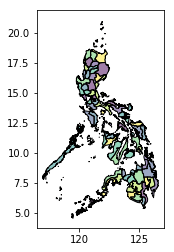

In [4]:
philgadm.plot()

### Barangay Informations

In [5]:
brgy = gpd.GeoDataFrame.from_file('./final/Barangays.shp')

In [6]:
brgy.head()

,ENGTYPE_3,ID_0,ID_1,ID_2,ID_3,ISO,NAME_0,NAME_1,NAME_2,NAME_3,NL_NAME_3,PROVINCE,REGION,TYPE_3,VARNAME_3,geometry
0,Village,177,1,16,172,PHL,Philippines,Abra,Manabo,San Jose Norte,,Abra,Cordillera Administrative Region (CAR),Barangay,,"POLYGON ((120.7004318237306 17.45648002624512,..."
1,Village,177,1,16,173,PHL,Philippines,Abra,Manabo,San Jose Sur,,Abra,Cordillera Administrative Region (CAR),Barangay,,"POLYGON ((120.7478332519531 17.44495964050304,..."
2,Village,177,1,16,174,PHL,Philippines,Abra,Manabo,San Juan Norte,,Abra,Cordillera Administrative Region (CAR),Barangay,,"POLYGON ((120.697883605957 17.4354190826416, 1..."
3,Village,177,1,16,175,PHL,Philippines,Abra,Manabo,San Juan Sur,,Abra,Cordillera Administrative Region (CAR),Barangay,,"POLYGON ((120.6651611328126 17.42831993103033,..."
4,Village,177,1,16,176,PHL,Philippines,Abra,Manabo,San Ramon East,,Abra,Cordillera Administrative Region (CAR),Barangay,,"POLYGON ((120.7056732177734 17.42276954650873,..."


In [8]:
brgy.NAME_1.value_counts()

Iloilo                 1888
Metropolitan Manila    1691
Leyte                  1641
Pangasinan             1365
Quezon                 1243
Cebu                   1204
Lanao del Sur          1158
Bohol                  1109
Batangas               1079
Camarines Sur          1065
Isabela                1055
Samar                   951
Nueva Ecija             849
Cavite                  830
Cagayan                 820
Zamboanga del Sur       779
Ilocos Sur              768
Albay                   720
Zamboanga del Norte     691
Laguna                  679
Negros Occidental       660
Eastern Samar           597
Antique                 589
La Union                576
Northern Samar          569
Bulacan                 566
Ilocos Norte            558
Negros Oriental         557
Masbate                 550
Pampanga                538
                       ... 
Nueva Vizcaya           275
Benguet                 269
Basilan                 255
Agusan del Norte        250
Sultan Kudarat      

In [11]:
ncr = brgy[brgy['NAME_1']=='Metropolitan Manila'].reset_index()
ncr

,index,ENGTYPE_3,ID_0,ID_1,ID_2,ID_3,ISO,NAME_0,NAME_1,NAME_2,NAME_3,NL_NAME_3,PROVINCE,REGION,TYPE_3,VARNAME_3,geometry
0,21341,Village,177,47,955,25137,PHL,Philippines,Metropolitan Manila,Manila,Barangay 744,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9931182861328 14.57284069061279,..."
1,21342,Village,177,47,955,25138,PHL,Philippines,Metropolitan Manila,Manila,Barangay 745,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9967269897461 14.56958103179932,..."
2,21343,Village,177,47,955,25139,PHL,Philippines,Metropolitan Manila,Manila,Barangay 746,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9972076416017 14.56912708282471,..."
3,21344,Village,177,47,955,25140,PHL,Philippines,Metropolitan Manila,Manila,Barangay 747,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9985427856446 14.57234096527094,..."
4,21345,Village,177,47,955,25141,PHL,Philippines,Metropolitan Manila,Manila,Barangay 748,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9977874755861 14.57196044921886,..."
5,21346,Village,177,47,955,25142,PHL,Philippines,Metropolitan Manila,Manila,Barangay 749,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9997024536134 14.57077026367193,..."
6,21347,Village,177,47,955,25143,PHL,Philippines,Metropolitan Manila,Manila,Barangay 75,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9662475585938 14.61330986022961,..."
7,21348,Village,177,47,955,25144,PHL,Philippines,Metropolitan Manila,Manila,Barangay 750,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.996955871582 14.57509040832514, ..."
8,21349,Village,177,47,955,25145,PHL,Philippines,Metropolitan Manila,Manila,Barangay 751,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9964904785157 14.57199096679682,..."
9,21350,Village,177,47,955,25146,PHL,Philippines,Metropolitan Manila,Manila,Barangay 752,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((120.9979476928711 14.57017040252686,..."


In [13]:
ncr.NAME_2.unique()

array(['Manila', 'Kalookan City', 'Las Piñas', 'Makati City', 'Malabon',
       'Mandaluyong', 'Marikina', 'Muntinlupa', 'Navotas', 'Parañaque',
       'Pasay City', 'Pasig City', 'Pateros', 'Quezon City', 'San Juan',
       'Taguig', 'Valenzuela'], dtype=object)

In [18]:
pasig = ncr[ncr['NAME_2']=='Pasig City']
pasig

,index,ENGTYPE_3,ID_0,ID_1,ID_2,ID_3,ISO,NAME_0,NAME_1,NAME_2,NAME_3,NL_NAME_3,PROVINCE,REGION,TYPE_3,VARNAME_3,geometry
1440,25655,Village,177,47,961,25582,PHL,Philippines,Metropolitan Manila,Pasig City,Bagong Ilog,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0642471313477 14.57770061492926,..."
1441,25656,Village,177,47,961,25583,PHL,Philippines,Metropolitan Manila,Pasig City,Bagong Katipunan,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0750961303711 14.56121063232428,..."
1442,25657,Village,177,47,961,25584,PHL,Philippines,Metropolitan Manila,Pasig City,Bambang,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0747528076172 14.55921077728271,..."
1443,25658,Village,177,47,961,25585,PHL,Philippines,Metropolitan Manila,Pasig City,Buting,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0683288574219 14.55762100219727,..."
1444,25659,Village,177,47,961,25586,PHL,Philippines,Metropolitan Manila,Pasig City,Caniogan,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0774765014648 14.57739067077642,..."
1445,25660,Village,177,47,961,25587,PHL,Philippines,Metropolitan Manila,Pasig City,Dela Paz,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0951385498047 14.62148094177257,..."
1446,25661,Village,177,47,961,25588,PHL,Philippines,Metropolitan Manila,Pasig City,Kalawaan,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0851898193361 14.55677986145014,..."
1447,25662,Village,177,47,961,25589,PHL,Philippines,Metropolitan Manila,Pasig City,Kapasigan,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0747833251953 14.56611061096203,..."
1448,25663,Village,177,47,961,25590,PHL,Philippines,Metropolitan Manila,Pasig City,Kapitolyo,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0554122924806 14.57905101776129,..."
1449,25664,Village,177,47,961,25591,PHL,Philippines,Metropolitan Manila,Pasig City,Malinao,,Metropolitan Manila,Metropolitan Manila,Barangay,,"POLYGON ((121.0754470825196 14.56210422515863,..."


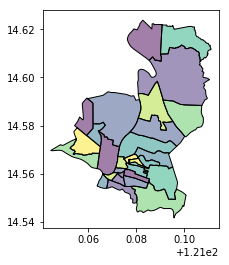

In [19]:
ugong = pasig['name']